# Chimera Example
-----

In [1]:
# install chimera
!pip install matter-chimera

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from chimera import Chimera

As an example we will consider three, one-dimensional objectives to be scalarized.

In [3]:
# First we define the three objectives

def obj_0(x):
    if x < 1:
        result = - 2 * x + 1
    elif x < 3.0:
        result = x - 2
    elif x < 3.5:
        result = 7 - 2 * x
    else:
        result = 2 * x - 7
    return result

def obj_1(x):
    return 1 - 2 * np.exp(-0.15 * (x-2.0)**2) + 1.25 * np.exp( - 10 * (x - 1.7)**2)

def obj_2(x):
    x = 6 - (x + 2)
    return 0.01 * (x+1)**2 + 0.01 * np.exp(- (x-2))

In [4]:
# Instantiate the Chimera object with the desired options
# Here we define relative tolarences of 60%, 40%, and 10% for the 1st, 2nd, and 
#  3rd objective, respectively
tolerances = np.array([0.6, 0.4, 0.1])  # i.e. 60%, 40%, 10%
absolutes = [False, False, False]  # i.e. all relative tolerances
goals = ['min', 'min', 'min']  # i.e. we are minimizing all 3 objectives
chimera = Chimera(tolerances=tolerances, absolutes=absolutes, goals=goals)

In [5]:
# we evaluate the three objectives between -1 and 5
domain = np.linspace(-1., 5., 1000)
loss_0 = np.zeros(len(domain))
for index, element in enumerate(domain):
    loss_0[index] = obj_0(element)
loss_1 = obj_1(domain)
loss_2 = obj_2(domain)

losses = np.array([loss_0, loss_1, loss_2])
print('losses: ', losses)
print('shape: ', losses.shape)

losses:  [[3.         2.98798799 2.97597598 ... 2.97597598 2.98798799 3.        ]
 [0.48151948 0.47871211 0.47589522 ... 0.47589522 0.47871211 0.48151948]
 [0.36049787 0.35978051 0.35906389 ... 0.19845857 0.19965301 0.20085537]]
shape:  (3, 1000)


In [6]:
# we the scalirize the objectived with chimera
scalarized = chimera.scalarize(losses.T)  # transpose losses such that its shape is (1000, 3)

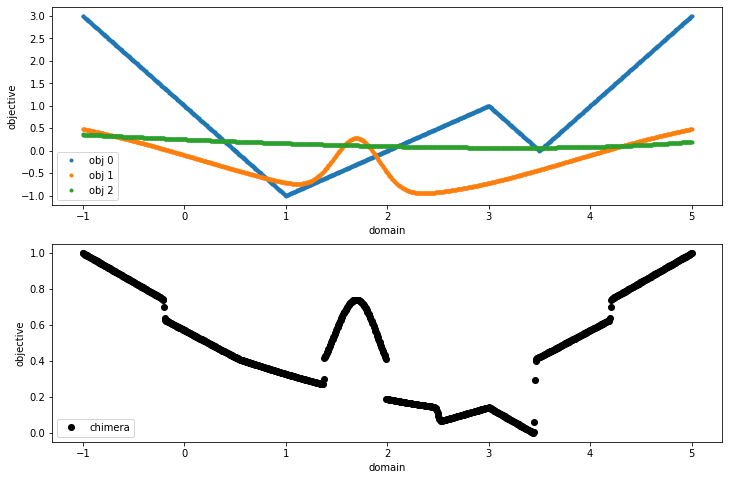

In [7]:
# plot the results
fig = plt.figure(figsize = (12, 8))
ax0 = plt.subplot2grid((2, 1), (0, 0))
ax1 = plt.subplot2grid((2, 1), (1, 0))

# first plot each objective individually
for index in range(len(losses)):
    ax0.plot(domain, losses[index], marker = '.', ls = '', label = 'obj %d' % index)

# then plot the scalarized objectives
ax1.plot(domain, scalarized, marker = 'o', ls = '', color = 'k', label = 'chimera')

ax0.legend()
ax1.legend()

_ = ax0.set_xlabel('domain')
_ = ax1.set_xlabel('domain')
_ = ax0.set_ylabel('objective')
_ = ax1.set_ylabel('objective')